
For our tic-tac-toe board, we will use a numpy array with dimension 3 by 3. 
Make a function create_board() that creates such a board, with values of integers 0.
Call create_board(), and store this as board


In [2]:
import numpy as np

In [3]:
def create_board():
    return np.array([[0,0,0],[0,0,0],[0,0,0]])


In [5]:
board = create_board()


    Players 1 and 2 will take turns changing values of this array from a 0 to a 1 or 2, indicating the number of the player who places there. Create a function place(board, player, position) with player being the current player (an integer 1 or 2), and position a tuple of length 2 specifying a desired location to place their marker. Only allow the current player to place a piece on the board (change the board position to their number) if that position is empty (zero).
    Use create_board() to store a board as board, and use place to have Player 1 place a piece on spot (0, 0).


In [18]:
def place(board, player, position):
    board[position] = player


In [87]:
place(board,1,(2,2))

In [88]:
board

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [23]:
board[(0,0)] = 0

In [24]:
board

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])


    Create a function possibilities(board) that returns a list of all positions (tuples) on the board that are not occupied (0). (Hint: numpy.where is a handy function that returns a list of indexes that meet a condition.)
    board is already defined from previous exercises. Call possibilities(board) to see what it returns!


In [110]:
def possibilities(board):
    res = []
    for i in range(3):
        for j in range(3):
            if board[i,j] == 0:
                res.append((i,j))
    return res

In [85]:
board

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [89]:
possibilities(board)

[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]


    Write a function random_place(board, player) that places a marker for the current player at random among all the available positions (those currently set to 0).
    Find possible placements with possibilities(board).
    Select one possible placement at random using random.choice(selection).
    board is already defined from previous exercises. Call random_place(board, player) to place a random marker for Player 2, and store this as board to update its value.


In [112]:
import random

def random_place(board, player):
    positions = possibilities(board)
    position = random.choice(positions)
    place(board,player,position)

random_place(board, 2)
    

In [113]:
board

array([[1, 0, 2],
       [0, 1, 0],
       [0, 0, 1]])


    board is already defined from previous exercises. Use random_place(board, player) to place three pieces on board each for players 1 and 2.
    Print board to see your result.


In [149]:
board = create_board()
for i in range(3):
    for player in [1, 2]:
        random_place(board,player)

print(board)

[[1 0 0]
 [2 2 1]
 [0 2 1]]



    Now that players may place their pieces, how will they know they've won? Make a function row_win(board, player) that takes the player (integer), and determines if any row consists of only their marker. Have it return True of this condition is met, and False otherwise.
    board is already defined from previous exercises. Call row_win to check if Player 1 has a complete row.


In [230]:

def row_win(board, player):
    result = [0,0,0]
    for i in range(3):
        for j in range(3):
            if board[i,j] == player:
                if i == 0 :
                    result[i] += 1
                elif i == 1:
                    result[i] += 1
                elif i == 2:
                    result[i] += 1
    
    if max(result) == 3:
        return True
    else:
        return False

In [140]:
row_win(board,2)

True

In [144]:
board

array([[1, 0, 1],
       [1, 0, 0],
       [2, 2, 2]])

In [129]:
result

[2, 0, 1]


    Create a similar function col_win(board, player) that takes the player (integer), and determines if any column consists of only their marker. Have it return True if this condition is met, and False otherwise.
    board is already defined from previous exercises. Call col_win to check if Player 1 has a complete column.


In [265]:

def col_win(board, player):
    result = [0,0,0]
    for i in range(3):
        for j in range(3):
            if board[i,j] == player:
                if j == 0:
                    result[0] += 1
                elif j == 1:
                    result[1] += 1
                elif j == 2:
                    result[2] += 1
    
    if max(result) == 3:
        return True
    else:
        return False

In [235]:
board = create_board()
def play(board):
    for i in range(3):
        for player in [1, 2]:
            random_place(board,player)

    print(board)


In [161]:
col_win(board,1)

True

In [160]:
result

[1, 2, 0]


    Finally, create a function diag_win(board, player) that tests if either diagonal of the board consists of only their marker. Have it return True if this condition is met, and False otherwise.
    board is already defined from previous exercises. Call diag_win to check if Player 1 has a complete diagonal.


In [232]:

def diag_win(board, player):
    result = [0,0]
    for i in range(3):
        for j in range(3):
            if board[i,j] == player:
                if j == i :
                    result[0] += 1
                    
                if (j == i) and j == 1:
                    result[1] += 1       
                elif (j == 2 and i == 0):
                    result[1] += 1       
                elif (j == 0 and i == 2):
                    result[1] += 1              
    if max(result) == 3:
        return True
    else:
        return False

In [224]:
board = create_board()
play(board)

[[2 0 1]
 [0 1 2]
 [1 2 0]]


In [226]:

diag_win(board,1)

True


    Create a function evaluate(board) that uses row_win, col_win, and diag_win functions for both players. If one of them has won, return that player's number. If the board is full but no one has won, return -1. Otherwise, return 0.
    board is already defined from previous exercises. Call evaluate to see if either player has won the game yet.


In [258]:
def evaluate(board):
    winner = 0
    for player in [1, 2]:
        # Check if `row_win`, `col_win`, or `diag_win` apply.  if so, store `player` as `winner`.
        if row_win(board,player) or col_win(board,player) or diag_win(board,player):
            winner = player
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

[[0 0 2]
 [0 1 2]
 [1 1 2]]


In [267]:
evaluate(board)

2

In [259]:
for player in [1,2]:
    if row_win(board,player) or col_win(board,player) or diag_win(board,player):
            print player

In [266]:
col_win(board,2)

True

In [264]:
result

[1, 1, 1]


    create_board(), random_place(board, player), and evaluate(board) have been created from previous exercises. Create a function play_game() that creates a board, calls alternates between two players (beginning with Player 1), and evaluates the board for a winner after every placement. Play the game until one player wins (returning 1 or 2 to reflect the winning player), or the game is a draw (returning -1).
    Call play_game once.


In [278]:

def play_game():
    board = create_board()
    
    for i in range(3):
        for player in [1, 2]:
            random_place(board,player)
            #print(board)
            if evaluate(board):
                return evaluate(board)

In [281]:
print play_game()

None



    Use the play_game() function to play 1,000 random games, where Player 1 always goes first.
    When doing this, import and use the time library to call the time function both before and after playing all 1,000 games in order to evaluate how long this takes per game. Print your answer.
    The library matplotlib.pyplot has already been stored as plt. Use plt.hist and plt.show to plot a histogram of the results. Does Player 1 win more than Player 2? Does either player win more than each player draws?


 The game took 0.011347 
 The number of 1 win is 1, 2 win is 2 and null is 7 


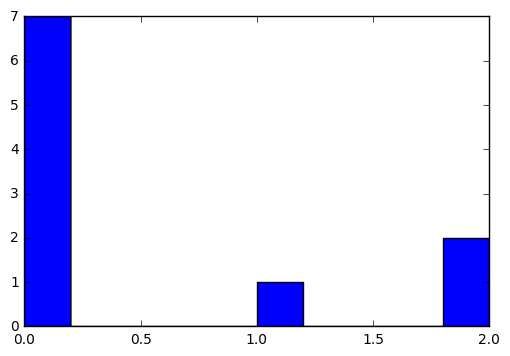

In [291]:
import time
import matplotlib.pyplot as plt
%matplotlib inline


winner = []

t1 = time.clock()

for i in range(10):
    winner.append(play_game())

t2 = time.clock()

print(" The game took {} ".format(t2 - t1))

print (" The number of 1 win is {}, 2 win is {} and null is {} ".format(winner.count(1),winner.count(2),winner.count(None)))

winner = [0 if v is None else v for v in winner]

plt.hist(winner)

plt.show()
    

92


    This result is expected --- when guessing at random, it's better to go first. Let's see if Player 1 can improve their strategy. create_board(), random_place(board, player), and evaluate(board) have been created from previous exercises. Create a function play_strategic_game(), where Player 1 always starts with the middle square, and otherwise both players place their markers randomly.
    Call play_strategic_game once.


In [292]:
def play_strategic_game():
    board, winner = create_board(), 0
    board[1,1] = 1
    while winner == 0:
        for player in [2,1]:
            # use `random_place` to play a game, and store as `board`.
            random_place(board,player)
            winner = evaluate(board)
            # use `evaluate(board)`, and store as `winner`.
            if winner != 0:
                break
    return winner

play_strategic_game() 

2


    The results from Exercise 12 have been stored. Use the play_strategic_game() function to play 1,000 random games.
    Use the time libary to evaluate how long all these games takes.
    The library matplotlib.pyplot has already been stored as plt. Use plt.hist and plt.show to plot your results. Did Player 1's performance improve? Does either player win more than each player draws?


 The game took 28.758635 
 The number of 1 win is 69352, 2 win is 19120 and null is 0 


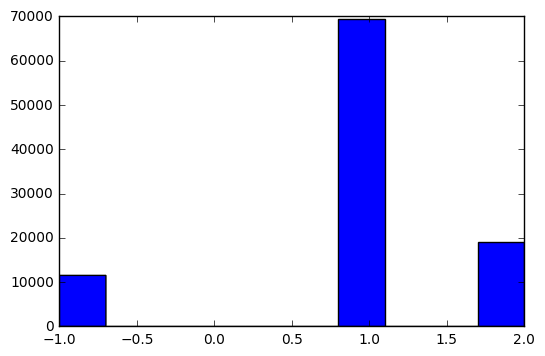

In [295]:

winner = []

t1 = time.clock()

for i in range(100000):
    winner.append(play_strategic_game())

t2 = time.clock()

print(" The game took {} ".format(t2 - t1))

print (" The number of 1 win is {}, 2 win is {} and null is {} ".format(winner.count(1),winner.count(2),winner.count(None)))

winner = [0 if v is None else v for v in winner]

plt.hist(winner)

plt.show()